<a href="https://colab.research.google.com/github/hildj/DS-4002-Project1/blob/main/EdaPlots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  product.productId                                      product.title  \
0        B000278ADA  Jobst Ultrasheer 15-20 Knee-High Silky Beige L...   
1        B000278ADA  Jobst Ultrasheer 15-20 Knee-High Silky Beige L...   
2        B00023DDSG              Jobst Ultrasheer 15-20 mmHg Pantyhose   
3        B000IK6ECK                  Motherlove: More Milk Plus Liquid   
4        B000IK6ECK                  Motherlove: More Milk Plus Liquid   

  product.price   review.userId         review.profileName  review.score  \
0         46.34   ASL7LZAL2LBMS     Ohio Nurse "bronwyn59"           5.0   
1         46.34  A1ZJAH4V5W1OKP     jud doolittle "Nana 3"           5.0   
2         50.00   ABY5HO9UBX91P             Dina L. Bruzek           2.0   
3         99.95  A175EHGHKN8GM4  Rainne P. Birdsong "Rain"           5.0   
4         99.95  A3ATEHXLYTGLV8                   J. Brown           5.0   

                               review.summary  \
0            Lower leg comfort for 12 hours +   


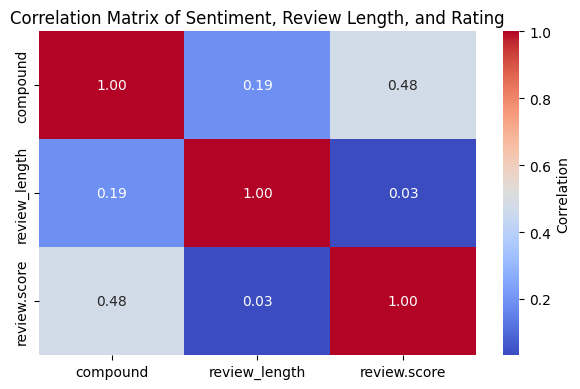

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("AmazonWithScores.csv")

print(df.head())


df['review_length'] = df['review.text'].astype(str).str.split().str.len()


numeric_cols = ['compound', 'review_length', 'review.score']


heatmap_df = df[numeric_cols].dropna()

corr = heatmap_df.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix of Sentiment, Review Length, and Rating')
plt.tight_layout()
plt.show()

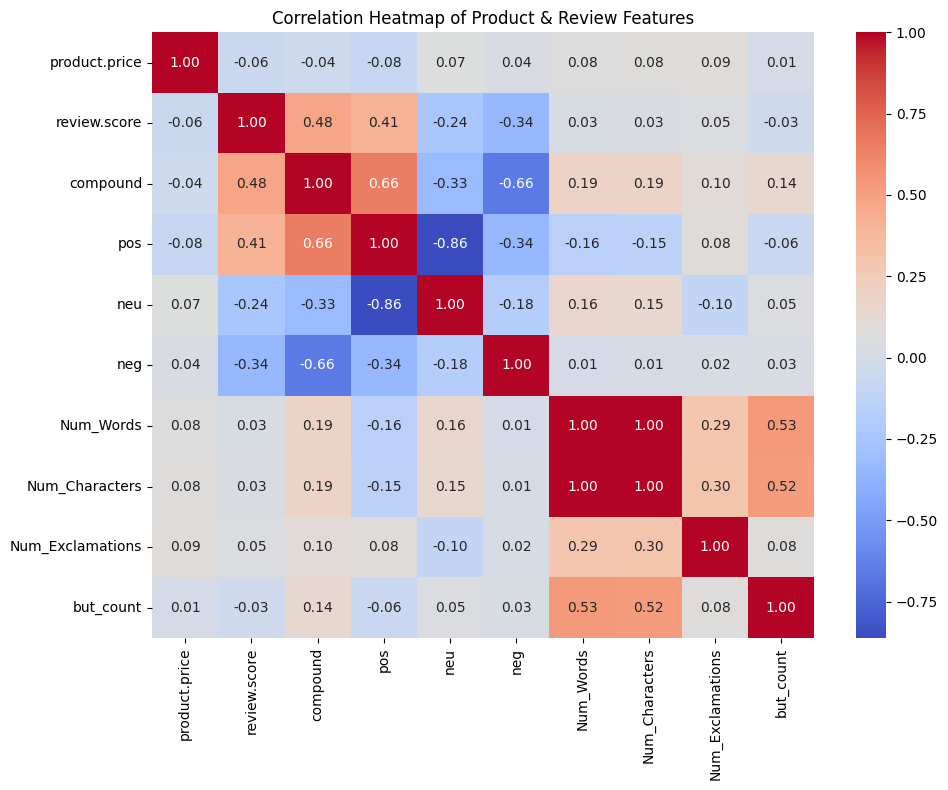

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("AmazonWithScores.csv")

df['product.price'] = df['product.price'].replace('unknown', pd.NA)
df['product.price'] = pd.to_numeric(df['product.price'])


num_cols = [
    'product.price', 'review.score', 'compound',
    'pos', 'neu', 'neg',
    'Num_Words', 'Num_Characters', 'Num_Exclamations', 'but_count'
]

corr = df[num_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Product & Review Features")
plt.tight_layout()
plt.show()

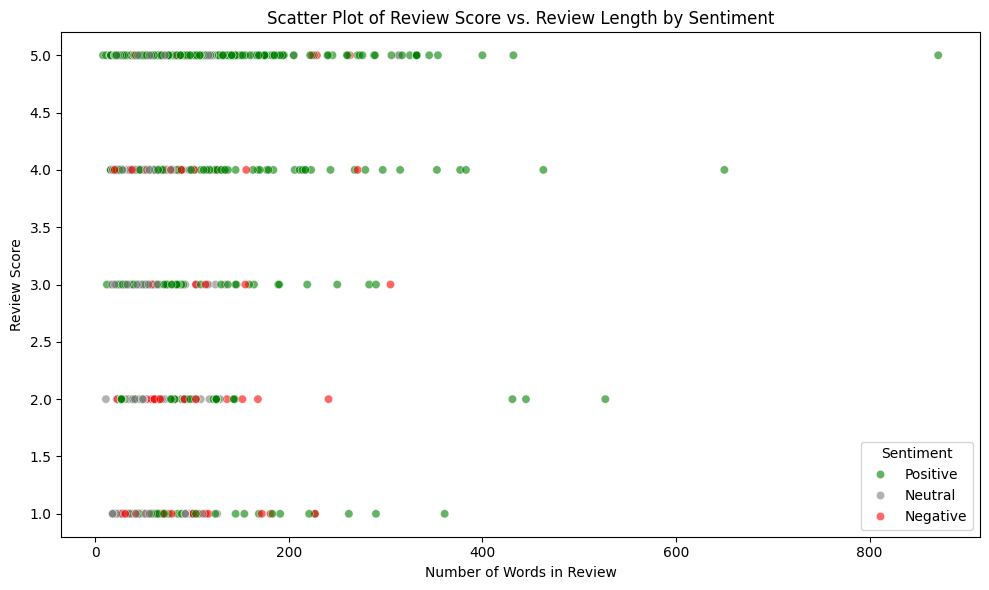

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("AmazonWithScores.csv")

def sentiment_category(row):
    if row['compound'] >= 0.5:
        return 'Positive'
    elif row['compound'] <= -0.5:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df.apply(sentiment_category, axis=1)

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='Num_Words',
    y='review.score',
    hue='Sentiment',
    palette={'Positive':'green', 'Neutral':'gray', 'Negative':'red'},
    alpha=0.6
)
plt.title('Scatter Plot of Review Score vs. Review Length by Sentiment')
plt.xlabel('Number of Words in Review')
plt.ylabel('Review Score')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()
